<a href="https://colab.research.google.com/github/saurabhdaund76/NYC-Taxi-Trip-Time-Prediction-capstone-2/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML projects/NYC Taxi Data.csv')

In [ ]:
# cheaking the dataset using 1st five rows 
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# total ids 
len(df['id'].unique())

1458644

In [ ]:
# total of columns 
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.describe()  # overview of the dataset mean max std 

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df_new = df.copy()

In [ ]:
df['pickup_datetime'].value_counts()

2016-02-09 21:03:38    5
2016-03-04 08:07:34    5
2016-04-05 18:55:21    5
2016-05-07 13:18:07    5
2016-01-12 18:48:44    5
                      ..
2016-02-07 15:09:37    1
2016-01-14 23:53:42    1
2016-05-14 02:13:38    1
2016-06-23 19:54:59    1
2016-04-23 15:35:16    1
Name: pickup_datetime, Length: 1380222, dtype: int64

In [ ]:
list_of_numeric_columns = df.describe().columns
list_of_numeric_columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

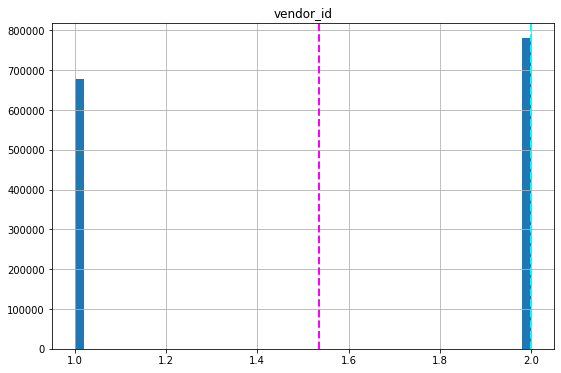

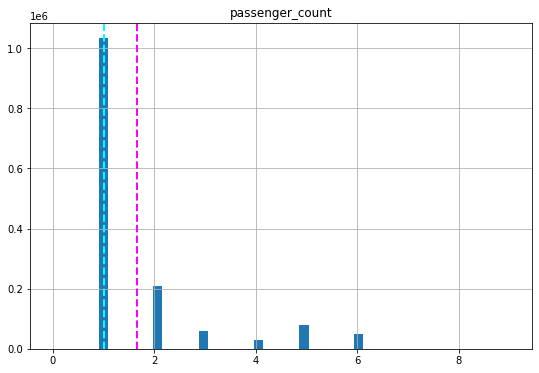

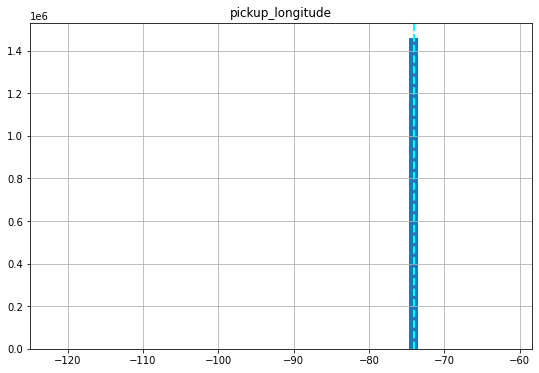

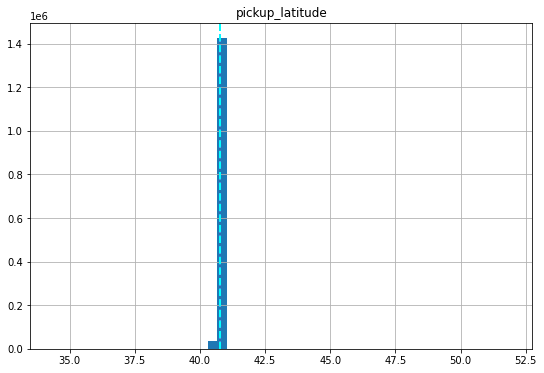

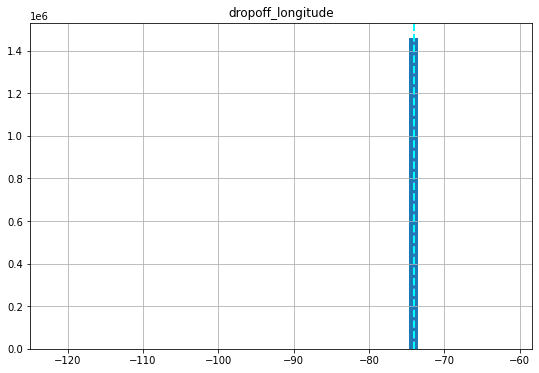

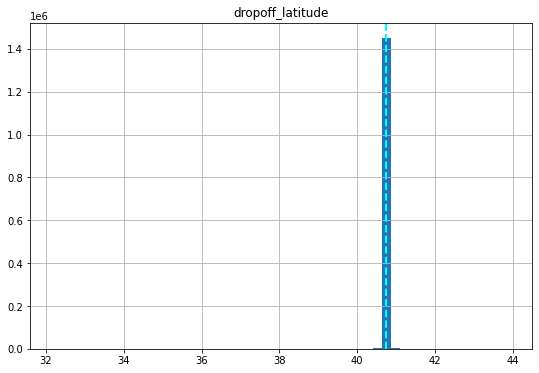

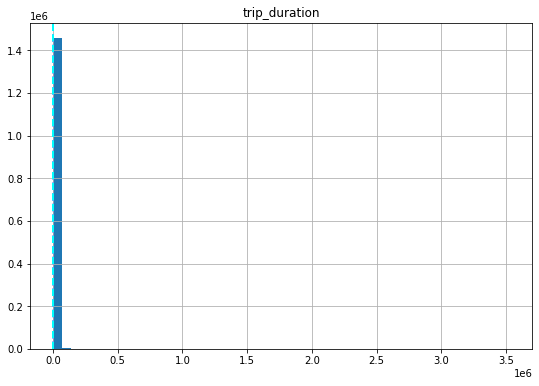

In [ ]:

# plot a bar plot for each numerical feature count
for col in list_of_numeric_columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()


In [ ]:
df['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [ ]:
df['passenger_count'].value_counts().reset_index().rename({'index':'no_of_passengers'} , axis=1)

,no_of_passengers,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,0,60
7,7,3
8,9,1
9,8,1


In [ ]:
# passengers with 0 count has no meaning so we will drop all these rows which anyhow wont affect the dataset
df = df[df.passenger_count != 0]

In [ ]:
df.shape

(1458584, 11)

In [ ]:
# converting object type date into datetime 
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df.dtypes # verify if object is converted to datetime

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1458584, 11)

In [ ]:
df['pickup_datetime'][0]

Timestamp('2016-03-14 17:24:55')

In [ ]:
# for better vizualization we will convert pickup nad drop time columns to extract days of pickup and drop

df['pick_day']= df['pickup_datetime'].dt.day_name()
df['drop_day'] = df['dropoff_datetime'].dt.day_name()


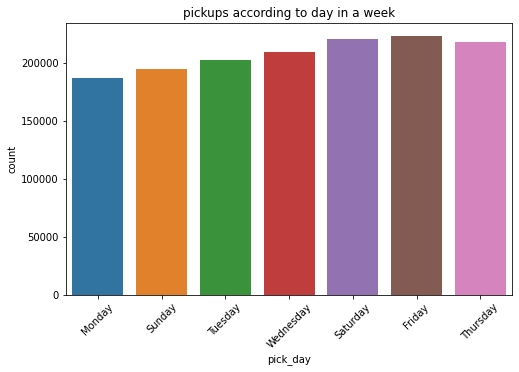

In [ ]:
# we will plot countplot to see pickup days accoridng to count
fig =plt.figure(figsize=(8,5))
ax = fig.gca()
sns.countplot(x='pick_day' , data=df)
ax.set_title('pickups according to day in a week')
plt.xticks(rotation = '45')
plt.show()

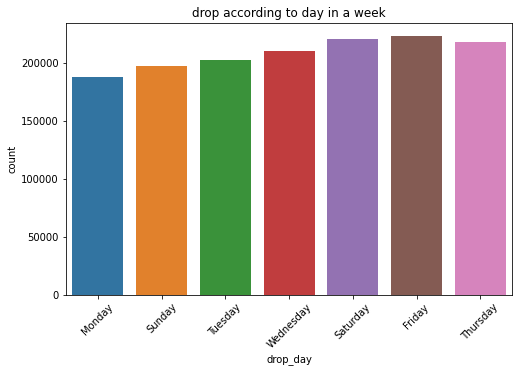

In [ ]:
# we will plot countplot to see pickup days accoridng to count
fig =plt.figure(figsize=(8,5))
ax = fig.gca()
sns.countplot(x='drop_day' , data=df)
ax.set_title('drop according to day in a week')
plt.xticks(rotation='45')
plt.show()

* We can see that maximum pickup is in sat sun and minimum pickup is on monday








In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday


In [ ]:
# now to see how much was an avarage length of the duration 
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['drop_hour'] = df['dropoff_datetime'].dt.hour

In [ ]:
# lets convert hours into bins of morning afternoon evening late night 
def timezone(x):
  x = 'morning' if x in range(6,12) else 'afternoon' if x in range(12,16) else 'evening' if x in range(16,22) else 'late_night'
  return x


In [ ]:
df['time_zone'] = df['pickup_hour'].apply(timezone)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day,pickup_hour,drop_hour,time_zone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,late_night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,afternoon


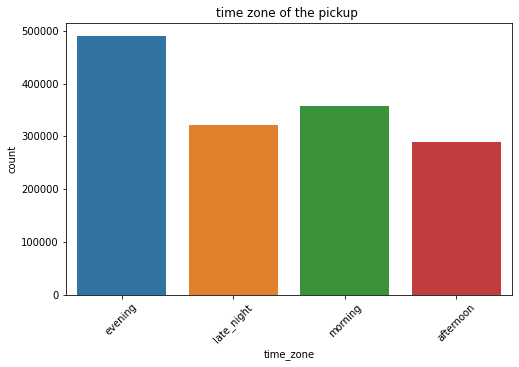

In [ ]:
# countplot variation of the time zone
fig =plt.figure(figsize=(8,5))
ax = fig.gca()
sns.countplot(x='time_zone' , data=df)
ax.set_title('time zone of the pickup ')
plt.xticks(rotation='45')
plt.show()

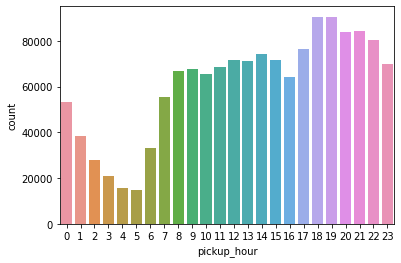

In [ ]:
# plot of pickup hour 

sns.countplot(x = 'pickup_hour' , data=df)

18 19 hours ie evening 6-7 has maximum pickups can be related as office leave times

As longitiude and latitude are given so with the help of geopy.distance library we will get the distance 

In [ ]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

#     # distance between lati and longi
# import math

# def total_distance(origin, destination):
#     lat1, lon1 = origin
#     lat2, lon2 = destination
#     radius = 6371 # km

#     dlat = math.radians(lat2-lat1)
#     dlon = math.radians(lon2-lon1)
#     a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
#         * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
#     c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
#     d = radius * c

#     return d

In [ ]:

df["distance"] = df.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day,pickup_hour,drop_hour,time_zone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,evening,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,late_night,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,morning,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,evening,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,afternoon,1.188962


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

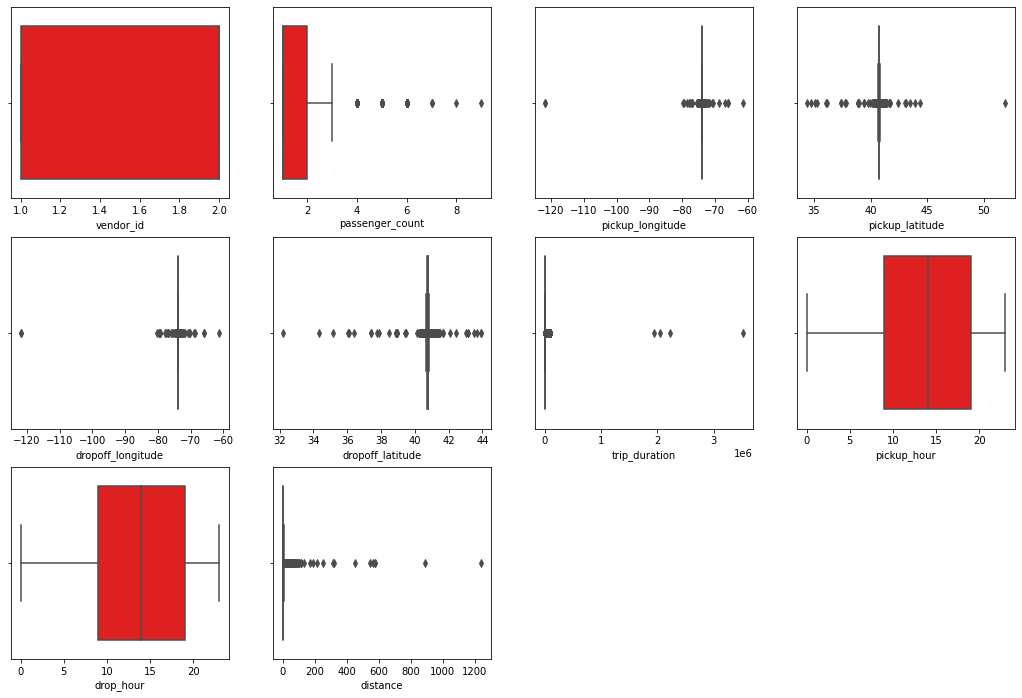

In [ ]:
list_of_columns = df.describe().columns

plt.figure(figsize=(18,12))
n = 1
for column in list_of_columns:
  plt.subplot(3,4,n)
  n = n+1
  sns.boxplot(df[column], color= 'Red')
plt.show()

In [ ]:
# lets handle these outliers 
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64

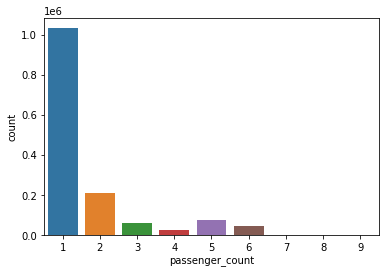

In [ ]:
sns.countplot(x='passenger_count' , data=df)

As we can see maximum passengers lie in range of 1 to 4 so rest are outliers

* So we will handle the outliers using IQR 
* IQR = Q3-Q1
* where Q3 is quartile 3 ie 75% and quartile 1 is 25% 
* Which is also called as upper limit and lower limit 

In [ ]:
# for passengers count
Q1_passenger = np.percentile(df['passenger_count'] , 25)
print(Q1_passenger)
Q2_passenger = np.percentile(df['passenger_count'],50)
print(Q2_passenger)
Q3_passenger = np.percentile(df['passenger_count'],75)
print(Q3_passenger)

1.0
1.0
2.0


* IQR is Q3-Q1 
* Q1 = lower limit = Q1_passenger-1.5*IQR
* Q3 = upper limit = Q3_passenger + 1.5*IQR

In [ ]:
IQR = Q3_passenger- Q1_passenger

In [ ]:
lower_limit_passenger = Q1_passenger - 1.5*IQR
upper_limit_passenger = Q3_passenger + 1.5*IQR

In [ ]:
print("Lower limit for passenger is :" , lower_limit_passenger )
print("upper limit for passenger is :" , upper_limit_passenger )

Lower limit for passenger is : -0.5
upper limit for passenger is : 3.5


In [ ]:
df = df[df['passenger_count']> lower_limit_passenger]
df = df[df['passenger_count']<upper_limit_passenger]

In [ ]:
df.shape

(1303754, 17)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day,pickup_hour,drop_hour,time_zone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,evening,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,late_night,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,morning,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,evening,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,afternoon,1.188962


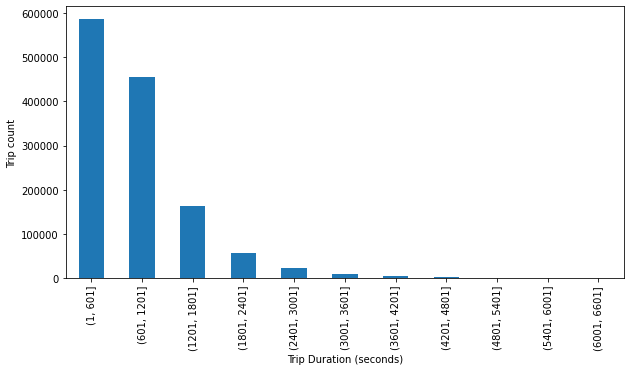

In [ ]:
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='bar')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip count')
plt.show()

As we can see from this graph maximum trips are completed in 3000 secs

In [ ]:
# outliers of trip duration
Q1_trip_duration = np.percentile(df['trip_duration'],25)
print(Q1_trip_duration)
Q2_trip_duration = np.percentile(df['trip_duration'],50)
print(Q2_trip_duration)
Q3_trip_duration = np.percentile(df['trip_duration'],75)
print(Q3_trip_duration)

396.0
661.0
1073.0


In [ ]:
IQR = Q3_trip_duration- Q1_trip_duration
lower_limit_trip_duration = Q1_trip_duration - 1.5*IQR
upper_limit_trip_duration = Q3_trip_duration + 1.5*IQR

In [ ]:
print("lower limit for trip_duration  :",lower_limit_trip_duration)
print("Upper limit for trip_duration  :",upper_limit_trip_duration)

lower limit for trip_duration  : -619.5
Upper limit for trip_duration  : 2088.5


* Here we can see that 99% of the values lie around 8000 secs and when we take 100% value it is in lakhs which is clearly an outlier so we will take a range of 99%

In [ ]:
# outliers of distance 

Q1_distance = np.percentile(df['distance'],25)
print(Q1_distance)
Q2_distance = np.percentile(df['distance'],50)
print(Q2_distance)
Q3_distance = np.percentile(df['distance'],90)
print(Q2_distance)

1.231188917095678
2.0930315975572884
2.0930315975572884


In [ ]:
IQR = Q3_distance - Q1_distance
lower_limit_distance = Q1_distance - 1.5*IQR
upper_limit_distance = Q3_distance + 1.5*IQR

In [ ]:

print("lower limit for outlier  :",lower_limit_distance)
print("Upper limit for outlier  :",upper_limit_distance)

lower limit for outlier  : -8.332330725542164
Upper limit for outlier  : 17.17038832149208


*** Here we handeled the necessary outliers

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day,pickup_hour,drop_hour,time_zone,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,evening,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,late_night,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,morning,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,evening,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,afternoon,1.188962


In [ ]:
# we will convert trip duration from secs to hours 
df['trip_duration_hour'] = df['trip_duration']/3600

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_day,drop_day,pickup_hour,drop_hour,time_zone,distance,trip_duration_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,17,17,evening,1.498991,0.126389
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,0,0,late_night,1.806074,0.184167
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,11,12,morning,6.387103,0.590000
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,19,19,evening,1.485965,0.119167
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,13,13,afternoon,1.188962,0.120833


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


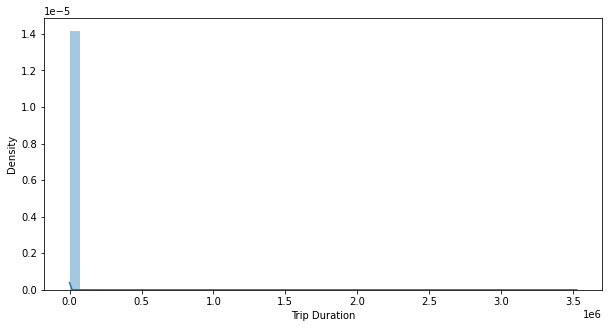

In [ ]:
# 1st we will look at dependent variable 

plt.figure(figsize = (10,5))
sns.distplot(df['trip_duration'])
plt.xlabel('Trip Duration')

plt.show()

As we can see it id highly right skewed by applying logrethmic transformation it will be normalised

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


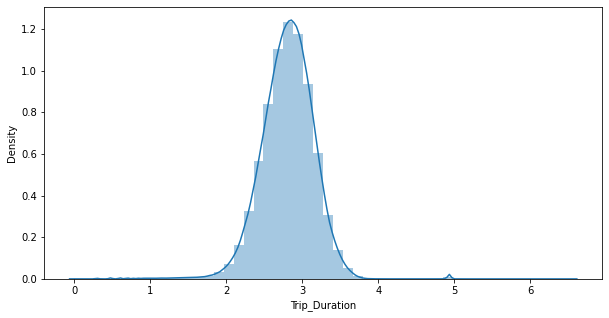

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df['trip_duration']))
plt.xlabel('Trip_Duration')
plt.show()

In [ ]:
# now we will look into some bivariate analysis taking trip duration into consideration 
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pick_day', 'drop_day', 'pickup_hour', 'drop_hour',
       'time_zone', 'distance', 'trip_duration_hour'],
      dtype='object')

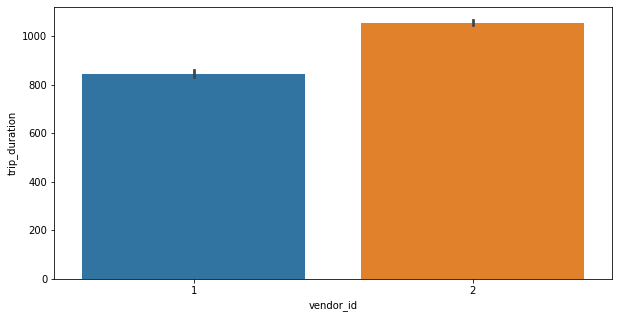

In [ ]:
# 1. how trip duration varied according to vendor id

plt.figure(figsize=(10,5))
sns.barplot(x ='vendor_id' , y='trip_duration',data=df)

Id 2 has longer trip duration

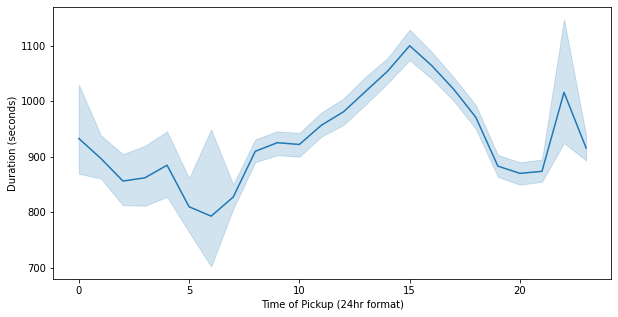

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()


We can see maximum duration of trips is around 3pm and lowest around morning times


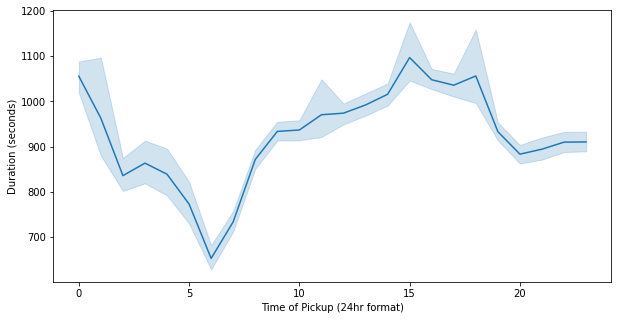

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(x='drop_hour',y='trip_duration',data=df)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

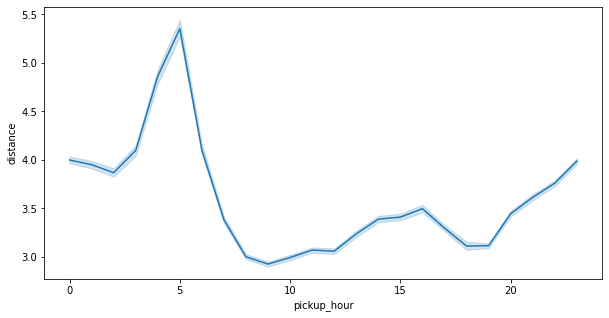

In [ ]:
# time according to distance
plt.figure(figsize = (10,5))
sns.lineplot(y='distance',x='pickup_hour',data=df)
plt.show()

Max pickup is in morning hours, and drastically drops in the afternoon time, and gradually increses towards late night

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pick_day', 'drop_day', 'pickup_hour', 'drop_hour',
       'time_zone', 'distance', 'trip_duration_hour'],
      dtype='object')

In [ ]:
# Feature engineering 

df = pd.get_dummies(df,columns=['pick_day'],  drop_first=True)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,drop_day,pickup_hour,drop_hour,time_zone,distance,trip_duration_hour,pick_day_Monday,pick_day_Saturday,pick_day_Sunday,pick_day_Thursday,pick_day_Tuesday,pick_day_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,17,17,evening,1.498991,0.126389,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,0,0,late_night,1.806074,0.184167,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,11,12,morning,6.387103,0.590000,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,19,19,evening,1.485965,0.119167,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,13,13,afternoon,1.188962,0.120833,0,1,0,0,0,0


In [ ]:
df= df.drop(['id','pickup_datetime' ,'dropoff_datetime','pickup_longitude',
             'pickup_latitude','dropoff_longitude','dropoff_longitude',
             'store_and_fwd_flag','drop_day','time_zone','drop_hour','dropoff_latitude'] , axis=1)

In [ ]:
df.head()

,vendor_id,passenger_count,trip_duration,pickup_hour,distance,trip_duration_hour,pick_day_Monday,pick_day_Saturday,pick_day_Sunday,pick_day_Thursday,pick_day_Tuesday,pick_day_Wednesday
0,2,1,455,17,1.498991,0.126389,1,0,0,0,0,0
1,1,1,663,0,1.806074,0.184167,0,0,1,0,0,0
2,2,1,2124,11,6.387103,0.590000,0,0,0,0,1,0
3,2,1,429,19,1.485965,0.119167,0,0,0,0,0,1
4,2,1,435,13,1.188962,0.120833,0,1,0,0,0,0


In [ ]:
df.info

<bound method DataFrame.info of          vendor_id  passenger_count  ...  pick_day_Tuesday  pick_day_Wednesday
0                2                1  ...                 0                   0
1                1                1  ...                 0                   0
2                2                1  ...                 1                   0
3                2                1  ...                 0                   1
4                2                1  ...                 0                   0
...            ...              ...  ...               ...                 ...
1458637          1                1  ...                 0                   0
1458640          1                1  ...                 0                   0
1458641          2                1  ...                 0                   0
1458642          1                1  ...                 1                   0
1458643          1                1  ...                 1                   0

[1303754 rows x 12 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
